# 헬스케어 - 질병 데이터 분석 (코로나 바이러스)
코로나 바이러스 데이터 분석 - 환경 설정 및 데이터 구조 파악

- 라이브러리 로링

In [1]:
# !pip install missingno

In [2]:
# !pip install folium

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

# -------------------------- # 
import missingno as msno

# 워닝 방지
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
## colab 에서 csv 파일 업로드 방법
# from google.colab import files
# uploaded = files.upload()

In [5]:
df_corona = pd.read_csv('./input/covid_19_clean_complete.csv')

In [6]:
df_corona.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [7]:
df_corona.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

### 컬럼 명칭 : Columns

- Province/StateProvince/State  
- Country/RegionCountry/Region  
- LatLatitude of the location  
- LongLongitude of the location  
- DateDate of cumulative report  
- ConfirmedCumulative number of confirmed cases till this day  
- DeathsCumulative number of deaths till this day  
- RecoveredCumulative number of recovered cases till this day  

## 결측치 확인 

In [20]:
# isnull.sum()
df_corona.isnull().sum()

Province/State    14924
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

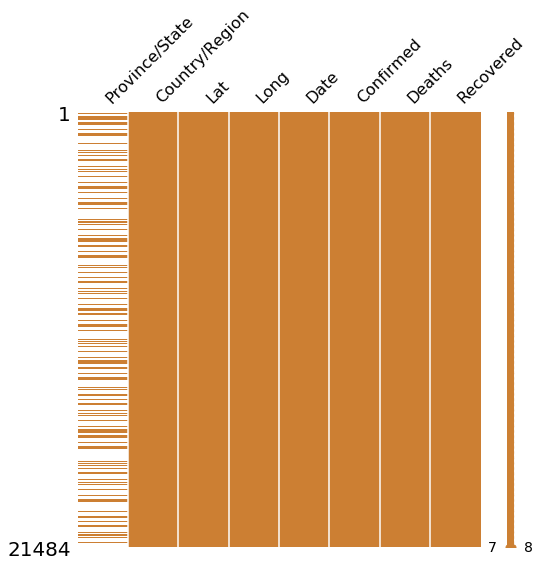

In [14]:
# 어느위치에 널데이터가 분포했는지를 확인 가능
msno.matrix(df = df_corona.iloc[:,:],figsize=(8,8), color = (0.8,0.5,0.2))

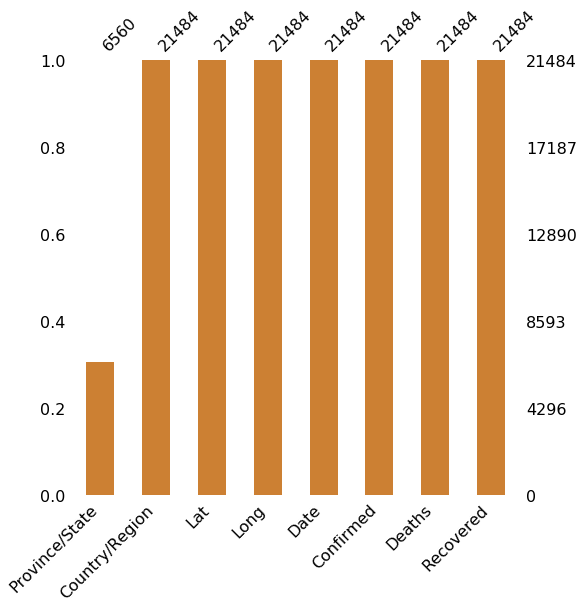

In [15]:
# 바차트
msno.bar(df = df_corona.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

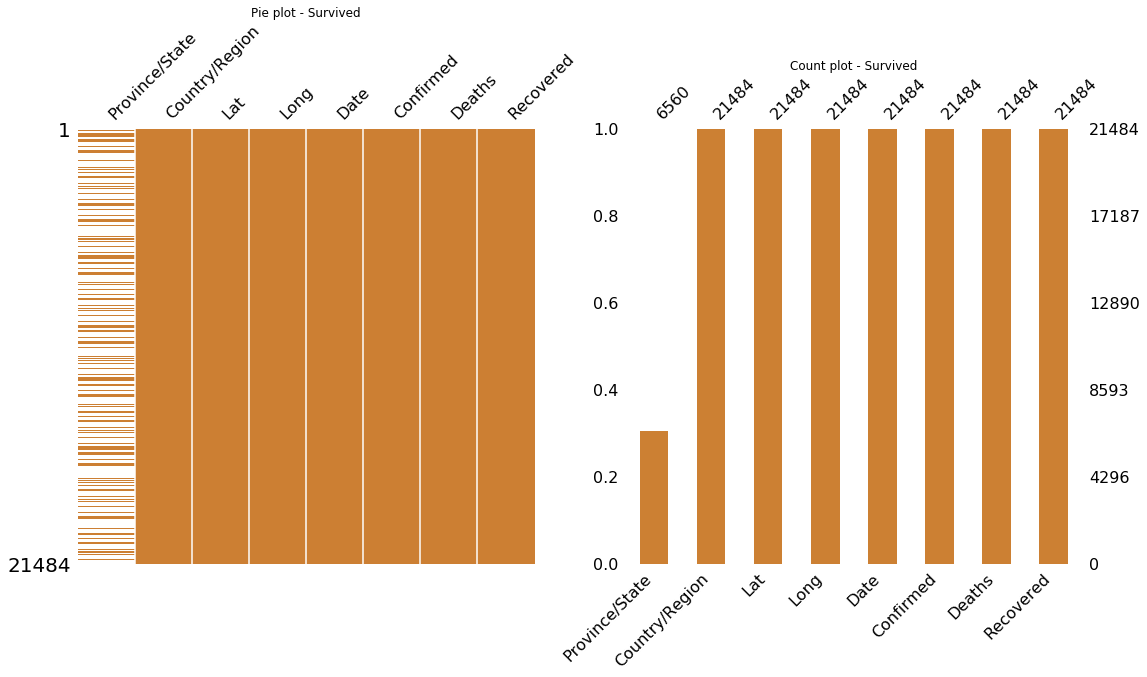

In [16]:
f, ax = plt.subplots(1,2,figsize = (18,8))

# 1번 : pieplot
msno.matrix(df = df_corona.iloc[:,:],figsize=(8,8), color = (0.8,0.5,0.2),ax=ax[0])
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('') # 왼쪽의 레이블을 없애겠음

# 2번 : countplot
msno.bar(df = df_corona.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2),ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [22]:
# 데이터 타입 확인
df_corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21484 entries, 0 to 21483
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  6560 non-null   object 
 1   Country/Region  21484 non-null  object 
 2   Lat             21484 non-null  float64
 3   Long            21484 non-null  float64
 4   Date            21484 non-null  object 
 5   Confirmed       21484 non-null  int64  
 6   Deaths          21484 non-null  int64  
 7   Recovered       21484 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.3+ MB


In [8]:
df_corona['Province/State'].sort_values()

9729     Alberta
10777    Alberta
19947    Alberta
20209    Alberta
8681     Alberta
          ...   
21477        NaN
21480        NaN
21481        NaN
21482        NaN
21483        NaN
Name: Province/State, Length: 21484, dtype: object

In [9]:
# 각 컬럼들이 뭘 의미하는지를 확실이 알아야 한다. 

In [10]:
df_corona['Province/State'].value_counts()

Hunan                       82
South Australia             82
Curacao                     82
Saint Barthelemy            82
Northern Territory          82
                            ..
Hong Kong                   82
Shandong                    82
Mayotte                     82
Jilin                       82
Turks and Caicos Islands    82
Name: Province/State, Length: 80, dtype: int64

In [11]:
# state = df_corona['Province/State'].unique()
# state ,len(state)

In [12]:
df_corona.shape

(21484, 8)

In [13]:
for col in df_corona.columns:
    percent = df_corona[col].isnull().sum() / df_corona[col].shape[0]
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (percent))
    print(msg)

column: Province/State	 Percent of NaN value: 69.47%
column: Country/Region	 Percent of NaN value: 0.00%
column:        Lat	 Percent of NaN value: 0.00%
column:       Long	 Percent of NaN value: 0.00%
column:       Date	 Percent of NaN value: 0.00%
column:  Confirmed	 Percent of NaN value: 0.00%
column:     Deaths	 Percent of NaN value: 0.00%
column:  Recovered	 Percent of NaN value: 0.00%


In [17]:
df_corona['Country/Region'].value_counts()

China                 2706
Canada                1148
France                 902
United Kingdom         902
Australia              656
                      ... 
Mauritius               82
Zimbabwe                82
Dominican Republic      82
Morocco                 82
Algeria                 82
Name: Country/Region, Length: 185, dtype: int64

In [18]:
corona_top10 = df_corona['Country/Region'].value_counts().iloc[:10]

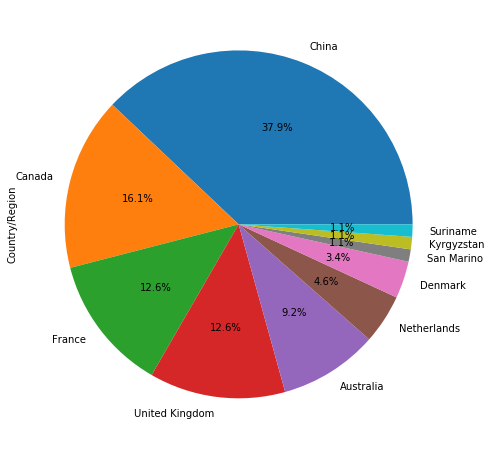

In [19]:
f, ax = plt.subplots(1, figsize = (18,8))
corona_top10.plot.pie(autopct ="%1.1f%%")

# Date 정보 수정 (Object => datetime)

In [23]:
df_corona['Date'] = pd.to_datetime(df_corona['Date'])
df_corona.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


## 국가별 최신 확진자, 사망자, 회복자 데이터 분석 


In [24]:
tmp = df_corona[df_corona['Date'] == max(df_corona['Date'])]
tmp

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
21222,NaN,Afghanistan,33.000000,65.000000,2020-04-12,607,18,32
21223,NaN,Albania,41.153300,20.168300,2020-04-12,446,23,217
21224,NaN,Algeria,28.033900,1.659600,2020-04-12,1914,293,591
21225,NaN,Andorra,42.506300,1.521800,2020-04-12,638,29,128
21226,NaN,Angola,-11.202700,17.873900,2020-04-12,19,2,4
...,...,...,...,...,...,...,...,...
21479,Saint Pierre and Miquelon,France,46.885200,-56.315900,2020-04-12,1,0,0
21480,NaN,South Sudan,6.877000,31.307000,2020-04-12,4,0,0
21481,NaN,Western Sahara,24.215500,-12.885800,2020-04-12,6,0,0
21482,NaN,Sao Tome and Principe,0.186360,6.613081,2020-04-12,4,0,0


In [25]:
# 최신데이터 만 남기기 
lastest_data = df_corona[df_corona['Date'] == max(df_corona['Date'])]

In [28]:
# 국가별 합계 구하기 
latest_country_sum = lastest_data.groupby('Country/Region')['Confirmed','Deaths','Recovered'].sum().reset_index()
latest_country_sum.head()

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,607,18,32
1,Albania,446,23,217
2,Algeria,1914,293,591
3,Andorra,638,29,128
4,Angola,19,2,4


In [29]:
# 사망자 높은 국가순으로 정렬 
latest_country_sort = latest_country_sum.sort_values(by='Deaths', ascending=False).reset_index(drop=True)
latest_country_sort

,Country/Region,Confirmed,Deaths,Recovered
0,US,555313,22020,32988
1,Italy,156363,19899,34211
2,Spain,166831,17209,62391
3,France,133670,14412,27469
4,United Kingdom,85206,10629,626
...,...,...,...,...
180,Holy See,8,0,2
181,South Sudan,4,0,0
182,Chad,18,0,2
183,Laos,19,0,0


In [30]:
latest_country_sort.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered
0,US,555313,22020,32988
1,Italy,156363,19899,34211
2,Spain,166831,17209,62391
3,France,133670,14412,27469
4,United Kingdom,85206,10629,626
5,Iran,71686,4474,43894
6,Belgium,29647,3600,6463
7,China,83134,3343,77956
8,Germany,127854,3022,60300
9,Netherlands,25743,2747,295


## 시간에 따른 확진자, 사망자, 회복자 분석


In [31]:
# 날짜별 확진자, 사망자, 회복자 합계 구하기 
date_status = df_corona.groupby('Date')['Confirmed','Deaths','Recovered'].sum()
date_status = date_status.sort_index()
date_status

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52
...,...,...,...
2020-04-08,1511102,88338,324502
2020-04-09,1595348,95455,348808
2020-04-10,1691717,102525,370234


### 시간에 따른 누적 확진자, 사망자, 회복자 그래프 (seaborn lineplot)

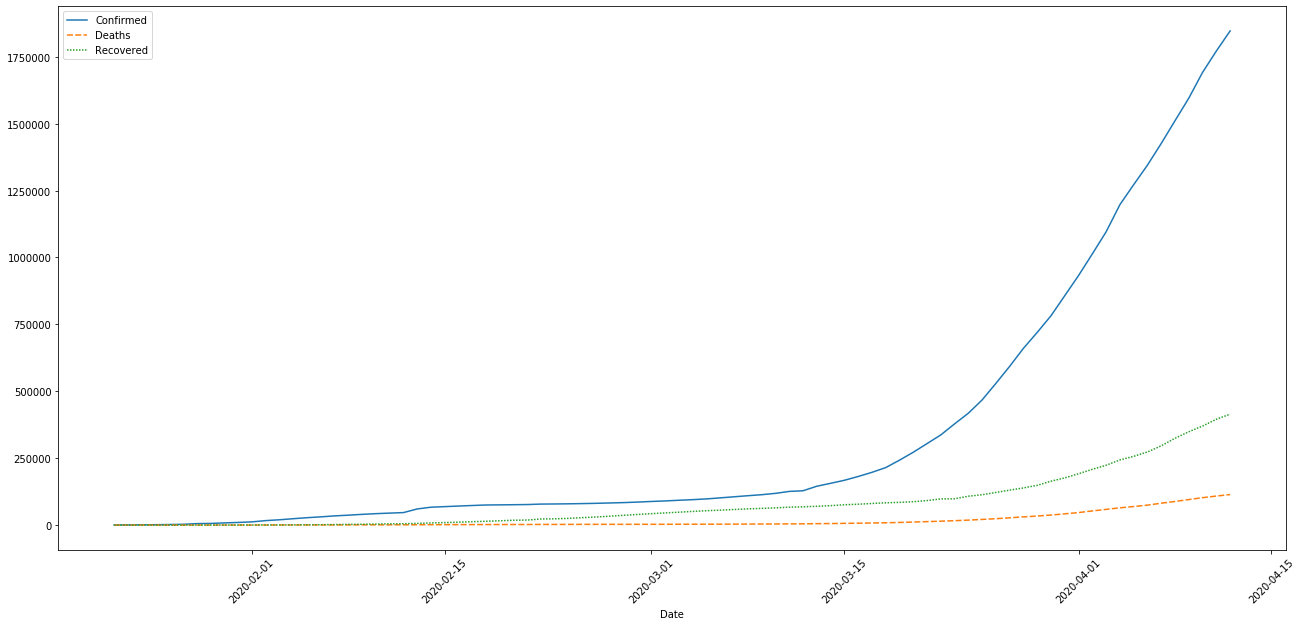

In [32]:
plt.figure(figsize=(22,10))
plt.xticks(rotation=45)
sns.lineplot(data=date_status)

In [33]:
import folium
m = folium.Map()
m

In [41]:
show_map = folium.Map(location=[0, 0], zoom_start=5)
               
for num in lastest_data.index:
    folium.CircleMarker([lastest_data['Lat'][num], lastest_data['Long'][num]],  # 경도, 위도
                        radius = int(lastest_data['Confirmed'][num]/10000), # 서클 지름
                        color  = 'red', fill='True', fill_color='red', # 서클 색, 채우기, 채우는 색
                        popup  = lastest_data['Country/Region'][num] + ":" + str(lastest_data['Confirmed'][num])).add_to(show_map)
                        # popup 마우스 오버시 출력돼는 정보

In [42]:
show_map